In [2]:
# 순환신경망: 과거의 기록을 재사용해서 현재 상태에 영향을 주는 것. (해당 개념은 이 정도의 개념만 알기. 더 이상의 논리 설명은 몰라도 라이브러리 사용하면 됨)

In [13]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.imdb.load_data(num_words=300)

In [14]:
train_input.shape

(25000,)

In [15]:
print(train_input[0]) # 2 -> 학습이 덜 되어서 2로 처리됨 (300개 데이터 범위에 없어서 학습이 덜 된 것)

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [16]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2)

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
train_seq = pad_sequences(train_input, maxlen=100)

In [19]:
train_seq.shape

(20000, 100)

In [20]:
train_seq[0]

array([  2,   2,   5,   2,   2,  60,  48,  49,   7,   4,   2,   5,   2,
        92,   2,   8,   2,   5,   2,   2,   2, 111,  81, 202,  12,  68,
        32,   4, 109,  37, 258,   2,   2, 280,  29,   2,   4,   2,   7,
        27,   2,   9,  31,   7, 148,   2,   2,  11,   4,   2,   7,   4,
         2,  10,  10,   4, 288,   2,   6,   2,   2,   2,   2,   2,   2,
        17,  73,  17,   2,   2,   5,   2,  44,   2,   2,  10,  10,  17,
         6,   2,  13,   2,   4,   2,   2,  57,   2, 121,  25,  26,  39,
        25,  80,  30,   2,   2,  34,  14,   2,   2])

In [21]:
train_input[0][-10:]

[39, 25, 80, 30, 2, 2, 34, 14, 2, 2]

In [23]:
val_seq = pad_sequences(val_input, maxlen=100)

In [24]:
model = keras.Sequential()

In [25]:
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

C:\Users\2-10\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
train_oh = keras.utils.to_categorical(train_seq)

In [28]:
train_oh.shape

(20000, 100, 300)

In [30]:
# train_oh[0][0][:]

In [31]:
val_oh = keras.utils.to_categorical(val_seq)

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 8)                   │           2,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

cp_cb = keras.callbacks.ModelCheckpoint('best_rnn.keras', save_best_only=True)

es_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[cp_cb, es_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6087 - loss: 0.6570 - val_accuracy: 0.5572 - val_loss: 0.6843
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6072 - loss: 0.6570 - val_accuracy: 0.5582 - val_loss: 0.6844
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6168 - loss: 0.6548 - val_accuracy: 0.5578 - val_loss: 0.6843
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6141 - loss: 0.6546 - val_accuracy: 0.5580 - val_loss: 0.6846


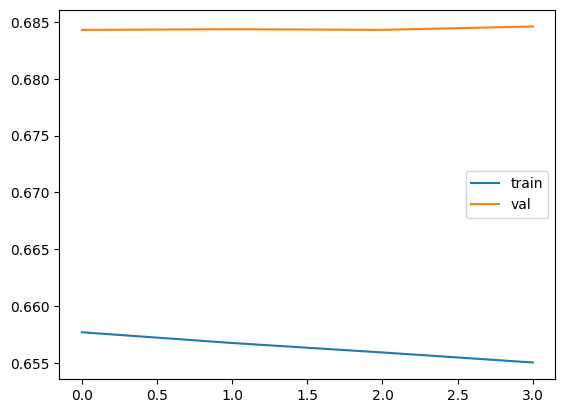

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.show()

In [53]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [54]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

cp_cb = keras.callbacks.ModelCheckpoint('best_rnn_emb.keras', save_best_only=True)

es_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[cp_cb, es_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.4957 - loss: 0.6969 - val_accuracy: 0.5460 - val_loss: 0.6880
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5927 - loss: 0.6794 - val_accuracy: 0.6532 - val_loss: 0.6640
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6609 - loss: 0.6558 - val_accuracy: 0.6900 - val_loss: 0.6400
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6889 - loss: 0.6317 - val_accuracy: 0.7114 - val_loss: 0.6153
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7098 - loss: 0.6070 - val_accuracy: 0.7078 - val_loss: 0.5965
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7248 - loss: 0.5817 - val_accuracy: 0.7318 - val_loss: 0.5690
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7353 - loss: 0.5584 - val_accuracy: 0.7096 - val_loss: 0.5706
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7446 - loss: 0.5387 - 

In [56]:
#원 핫 인코딩, 단어 인베딩 개념이 위 챕터의 핵심